<a href="https://colab.research.google.com/github/marcomedugno/marcomedugno/blob/main/Scraping_Twitter_Keywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
!pip install pycountry
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
!pip install langdetect
from langdetect import detect
!pip uninstall -y searchtweets
!pip install searchtweets-v2
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Authentication
consumerKey = 'private'
consumerSecret = 'private'
accessToken = 'private'
accessTokenSecret = 'private'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


Please enter keyword or hashtag to search: mobile tickets
Please enter how many tweets to analyze: 10000


In [ ]:
from itertools import islice
print(list(islice(tweets, 3)))

[Status(_api=<tweepy.api.API object at 0x7f8615d06d10>, _json={'created_at': 'Mon Jun 27 01:05:14 +0000 2022', 'id': 1541226112424022016, 'id_str': '1541226112424022016', 'text': "RT @pixelizeog: Craziest shit I saw in NYC was a guy didn't have his BAYC or a valid token in the wallet he claimed his ApeFest tickets wit…", 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'pixelizeog', 'name': 'pixelize.eth ⌐◨-◨', 'id': 1382450052942024705, 'id_str': '1382450052942024705', 'indices': [3, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 909052141360353280, 'id_str': '909052141360353280', 'name': 'swoleluksobags.eth', 'screen_name': 'Swole

In [ ]:
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 tweet_list.append(tweet.created_at)
 tweet_list.append(tweet.coordinates)
 analysis = TextBlob(tweet.text)
 import nltk
 nltk.download('vader_lexicon')
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
if neg > pos:
 negative_list.append(tweet.text)
 negative += 1
elif pos > neg:
 positive_list.append(tweet.text)
 positive += 1
 
elif pos == neg:
 neutral_list.append(tweet.text)
 neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is alre

In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  5350
positive number:  1
negative number:  0
neutral number:  0


In [ ]:
tweet_list

,0
0,"@didikissthefish Hi Holly, you can show your t..."
1,Interested in #welding but not sure what to ex...
2,RT @pixelizeog: Craziest shit I saw in NYC was...
3,2022-06-27 16:05:07
4,RT @pixelizeog: Craziest shit I saw in NYC was...
...,...
5345,2022-06-18 01:15:13
5346,None
5347,@ElisiaTickets44 Ticketing q. Any hard physica...
5348,2022-06-18 00:33:41


In [ ]:
positive_list

,0
0,@ElisiaTickets44 Ticketing q. Any hard physica...


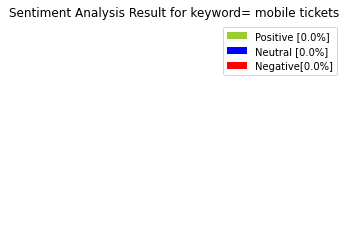

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,RT @Caza341791: Make Healthcare Safer For Pati...
1,"@newsobserver Sadly, for Raleigh the response ..."
2,New reviews keep coming in! See what these 2 c...
3,HealthCare Support Staffing had another great ...
4,IT staffing criminals (human smugglers) vandal...
...,...
2495,Ambulance staffing shortages may persist as pa...
2496,@Shem_Infinite I like Trump but my concern is ...
2497,RT @AndyPallotta: 📚✏️🍎 \nSchool staffing leve...
2498,Forbes recently released their ‘America’s Best...


In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = 'negative'
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = 'positive'
 else:
  tw_list.loc[index, 'sentiment'] = 'neutral'
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @Caza341791: Make Healthcare Safer For Pati...,RT @Caza341791: Make Healthcare Safer For Pati...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
1,"@newsobserver Sadly, for Raleigh the response ...","@newsobserver Sadly, for Raleigh the response ...",-0.445000,0.760000,negative,NaN,NaN,NaN,NaN
2,New reviews keep coming in! See what these 2 c...,New reviews keep coming in! See what these 2 c...,0.170455,0.454545,neutral,0.0,1.0,0.0,0.0
3,HealthCare Support Staffing had another great ...,HealthCare Support Staffing had another great ...,1.000000,0.750000,positive,NaN,NaN,NaN,NaN
4,IT staffing criminals (human smugglers) vandal...,IT staffing criminals (human smugglers) vandal...,0.000000,0.100000,negative,NaN,NaN,NaN,NaN
5,it bears mentioning that the trades are one of...,it bears mentioning that the trades are one of...,0.450000,0.750000,positive,NaN,NaN,NaN,NaN
6,RT @SupremeEngraver: With newly increased staf...,RT @SupremeEngraver: With newly increased staf...,0.257576,0.469697,positive,NaN,NaN,NaN,NaN
7,#HIRING : #Accountant in #WestSacramento\n\nIn...,#HIRING : #Accountant in #WestSacramento\n\nIn...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
8,RT @LetsGrowKids: Child care centers are strug...,RT @LetsGrowKids: Child care centers are strug...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN
9,RT @DanielaNadj: If there are queues and staff...,RT @DanielaNadj: If there are queues and staff...,0.000000,0.000000,negative,NaN,NaN,NaN,NaN


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list['sentiment']=='negative']
tw_list_positive = tw_list[tw_list['sentiment']=='positive']
tw_list_neutral = tw_list[tw_list['sentiment']=='neutral']

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,'sentiment')

,Total,Percentage
positive,619,37.93
neutral,519,31.80
negative,494,30.27


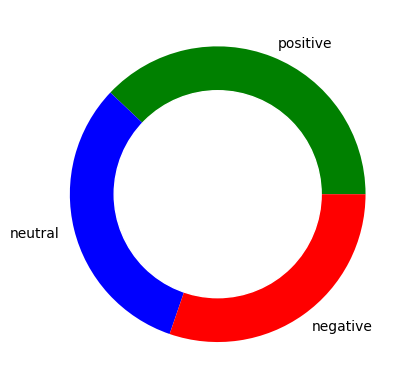

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,'sentiment')
names= pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 stopwords = set(STOPWORDS)
 stopwords.add('https')
 stopwords.add('nhttps')
 stopwords.add('co') 
 stopwords.add('RT')
 stopwords.add(keyword)
 wc = WordCloud(background_color='white',
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file('wc.png')
 print('Word Cloud Saved Successfully')
 path='wc.png'
 display(Image.open(path))

Word Cloud Saved Successfully


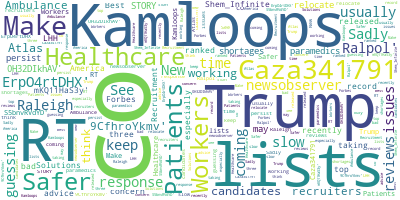

In [ ]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


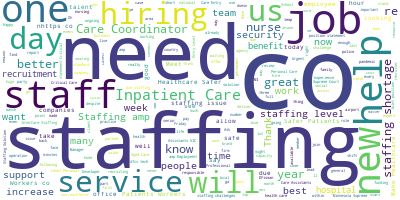

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


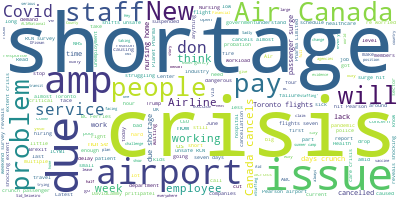

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [ ]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby('sentiment').text_len.mean()),2)

,text_len
sentiment,
negative,131.68
neutral,129.51
positive,131.74


In [ ]:
round(pd.DataFrame(tw_list.groupby('sentiment').text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.78
neutral,17.20
positive,18.67


In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @Caza341791: Make Healthcare Safer For Pati...,RT @Caza341791: Make Healthcare Safer For Pati...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN,86,10,RT Caza34171 Make Healthcare Safer For Patient...,"[rt, caza34171, make, healthcare, safer, for, ...","[rt, caza34171, make, healthcare, safer, patie...","[rt, caza34171, make, healthcar, safer, patien..."
1,"@newsobserver Sadly, for Raleigh the response ...","@newsobserver Sadly, for Raleigh the response ...",-0.445000,0.760000,negative,NaN,NaN,NaN,NaN,112,17,newsobserver Sadly for Raleigh the response ti...,"[newsobserver, sadly, for, raleigh, the, respo...","[newsobserver, sadly, raleigh, response, time,...","[newsobserv, sadli, raleigh, respons, time, us..."
2,New reviews keep coming in! See what these 2 c...,New reviews keep coming in! See what these 2 c...,0.170455,0.454545,neutral,0.0,1.0,0.0,0.0,131,18,New reviews keep coming in See what these 2 ca...,"[new, reviews, keep, coming, in, see, what, th...","[new, reviews, keep, coming, see, 2, candidate...","[new, review, keep, come, see, 2, candid, thin..."
3,HealthCare Support Staffing had another great ...,HealthCare Support Staffing had another great ...,1.000000,0.750000,positive,NaN,NaN,NaN,NaN,88,10,HealthCare Support Staffing had another great ...,"[healthcare, support, staffing, had, another, ...","[healthcare, support, staffing, another, great...","[healthcar, support, staf, anoth, great, revie..."
4,IT staffing criminals (human smugglers) vandal...,IT staffing criminals (human smugglers) vandal...,0.000000,0.100000,negative,NaN,NaN,NaN,NaN,144,19,IT staffing criminals human smugglers vandaliz...,"[it, staffing, criminals, human, smugglers, va...","[staffing, criminals, human, smugglers, vandal...","[staf, crimin, human, smuggler, vandal, car, 1..."


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

1632 Number of reviews has 6302 words


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,aarpfl,abba,abbott,abc,abcchicago,abcnew,abcworldnew,abid,abil,...,𝗱𝗼,𝗳𝗶𝘃𝗲,𝗳𝗼𝘂𝗿,𝗷𝗼𝗯𝘀,𝗻𝗼𝘁,𝗼𝗳,𝗼𝗿,𝗽𝗲𝗼𝗽𝗹𝗲,𝘁𝗵𝗲,𝘁𝗵𝗿𝗲𝗲
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
,435
rt,406
job,121
shortag,114
nurs,104
hire,100
issu,100
level,92
care,90
amp,87


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('staffing shortages', 65),
 ('staffing levels', 55),
 ('staffing issues', 45),
 ('staffing crisis', 43),
 ('davidlammy pritipatel', 30),
 ('air canada', 23),
 ('staffing shortage', 23),
 ('peopleready staffing', 23),
 ('staffing know', 23),
 ('know ve', 22),
 ('inpatient care', 20),
 ('care coordinator', 20),
 ('staffing https', 20),
 ('urgently increasing', 16),
 ('short staffing', 15),
 ('increasing staffing', 15),
 ('staffing amp', 14),
 ('canada cancels', 14),
 ('10 toronto', 14),
 ('staffing issue', 14)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('peopleready staffing know', 23),
 ('staffing know ve', 22),
 ('inpatient care coordinator', 20),
 ('urgently increasing staffing', 15),
 ('increasing staffing levels', 15),
 ('air canada cancels', 14),
 ('10 toronto flights', 13),
 ('days staffing crunch', 12),
 ('staffing crunch passenger', 11),
 ('canada cancels 10', 10),
 ('cancels 10 toronto', 10),
 ('crunch passenger surge', 10),
 ('staffing levels centre', 10),
 ('aged care entry', 10),
 ('care entry level', 10),
 ('entry level personal', 10),
 ('level personal care', 10),
 ('personal care assistants', 10),
 ('care assistants vic', 10),
 ('intercare staffing amp', 10)]